<p dir="ltr" style="line-height:1.38;background-color:#ffffff;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Download the&nbsp;</span><a href="https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/63/credit_card_default.csv" style="text-decoration:none;"><span style="font-size:10.5pt;font-family:Arial;color:#1155cc;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:underline;-webkit-text-decoration-skip:none;text-decoration-skip-ink:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">credit card default dataset</span></a><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">&nbsp;and save it to the same location as this script. Then run the code below to read this dataset.</span></p>
<p dir="ltr" style="line-height:1.38;background-color:#ffffff;margin-top:0pt;margin-bottom:0pt;padding:11pt 0pt 0pt 0pt;"><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">This dataset captures personal information as well as credit card payment history.
    
The PAY_DELAY columns represent how many months delayed payments were for 6 different payment periods.
    
The BILL columns represent the bill for each of those months.
    
The PAID columns represent how much was paid for each of those months.
    
Defaulted Next Month has 1 where the customer defaulted on the 7th month.
    
You'll use this dataset to build a model that can predict whether or not future customers are likely to default.</span></p>

In [1]:
import pandas as pd

credit_card_default=pd.read_csv("credit_card_default.csv",index_col=0)
credit_card_default.head()

,Defaulted Next Month,Credit Card Limit,Sex,Education level,Marriage,Age,PAY_DELAY1,PAY_DELAY2,PAY_DELAY3,PAY_DELAY4,...,BILL3,BILL4,BILL5,BILL6,PAID1,PAID2,PAID3,PAID4,PAID5,PAID6
ID,,,,,,,,,,,,,,,,,,,,,
219,0,110000,Unspecified,Grade School,Other,31,0,0,0,0,...,79288,73315,63818,63208,4000,5000,3000,3000,3000,8954
810,0,160000,Unspecified,High School,Other,37,0,0,0,0,...,38870,28574,27268,28021,35888,1325,891,1000,1098,426
821,0,200000,Unspecified,Grade School,Other,51,-1,-1,-1,-1,...,390,780,390,390,0,390,780,0,390,390
1020,0,180000,Unspecified,Grade School,Other,45,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2147,0,150000,Unspecified,Grade School,Other,55,-1,-1,-1,-1,...,9160,2939,3396,1870,17498,9160,2939,3396,1870,6800


<hr style="height:2px;border-width:0;color:black;background-color:black">

Take a moment to consider which of the columns above we'd like to predict.

Store this column in a variable called response and visualize it in a histogram.

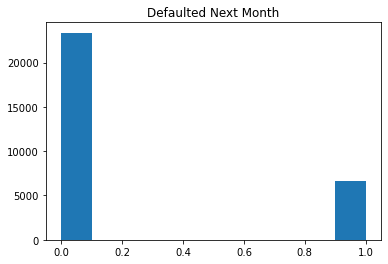

In [2]:
#Defaulted Next Month would be a very useful figure to be able to predict
#This will enable us to build a model that can predict when someone will default before they actually do
#We'll set response to equal Defaulted Next Month by indexing that column from the startups variable
response = credit_card_default[["Defaulted Next Month"]]

#We need to import the pyplot portion of the MatPlotLib library before using the hist() function
import matplotlib.pyplot as plt
#We just need to apply the hist() function to the response variable
plt.hist(response)
#We'll also add a title to make it clearer
plt.title("Defaulted Next Month");

<hr style="height:2px;border-width:0;color:black;background-color:black">

Store the remaining columns in a variable called predictors.

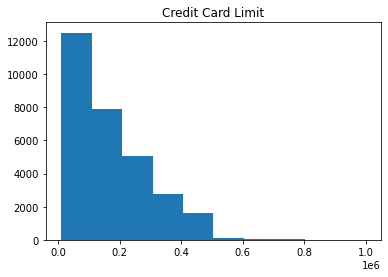

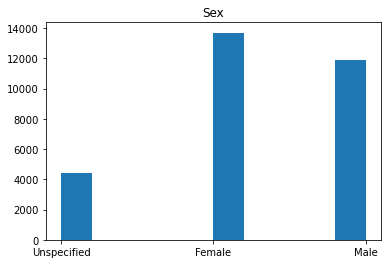

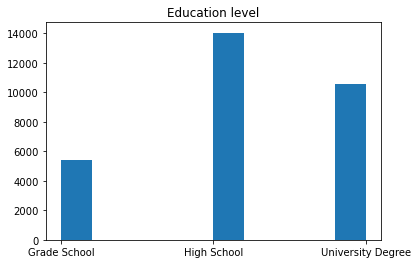

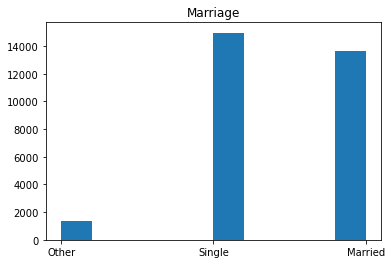

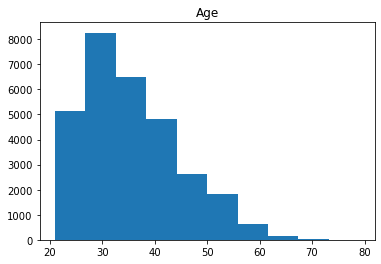

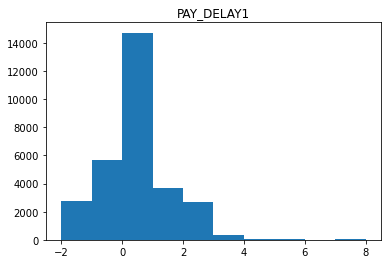

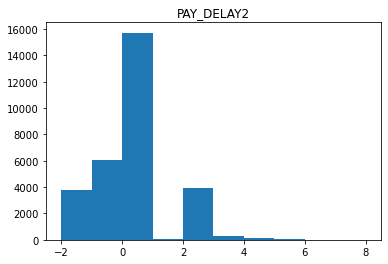

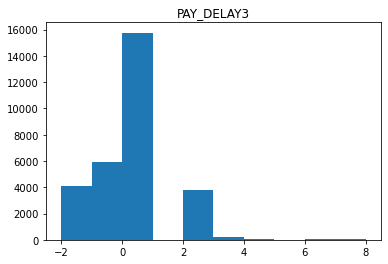

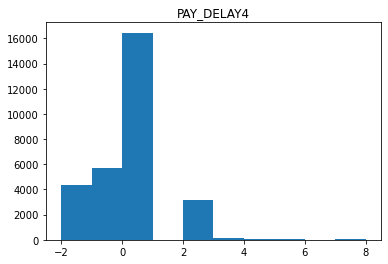

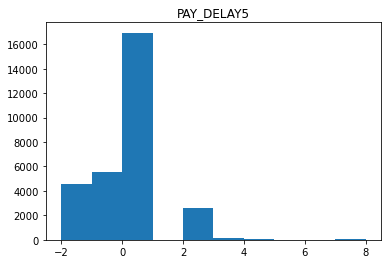

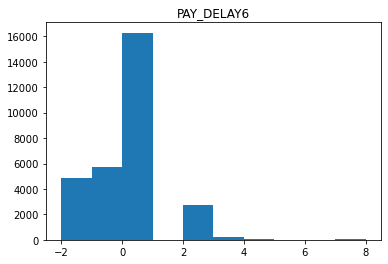

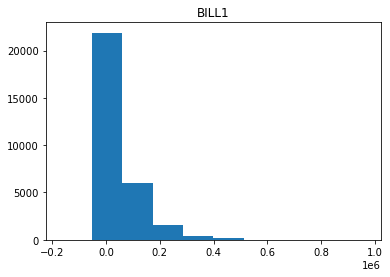

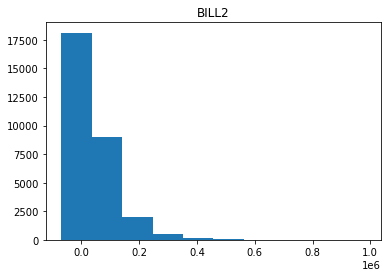

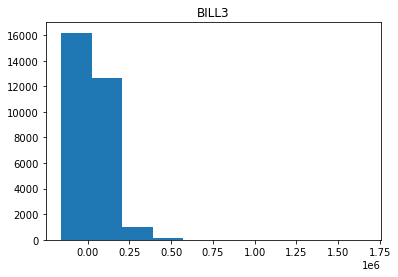

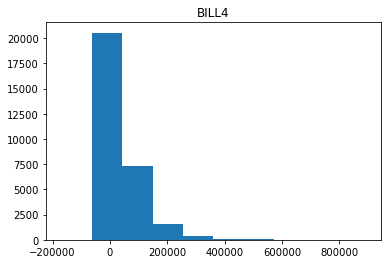

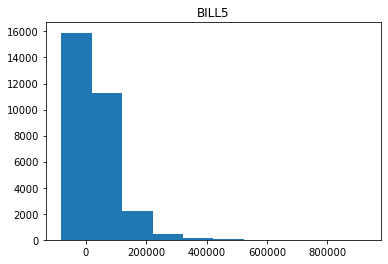

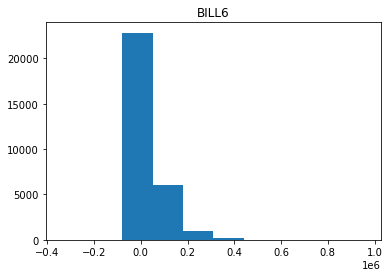

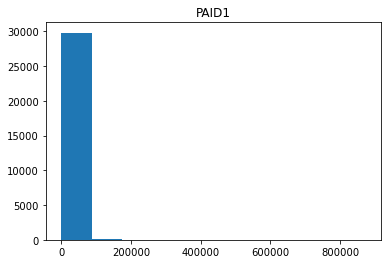

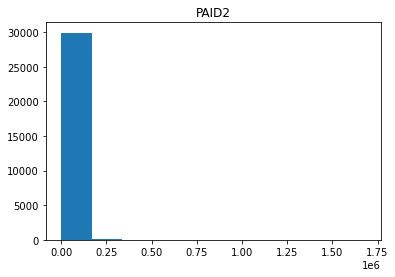

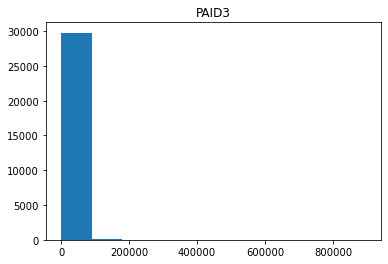

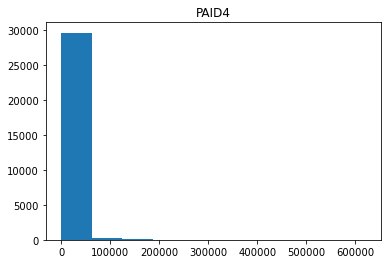

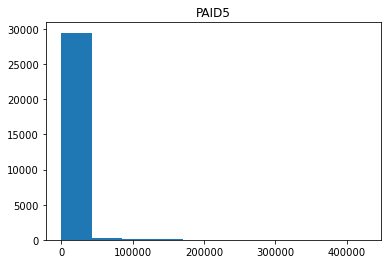

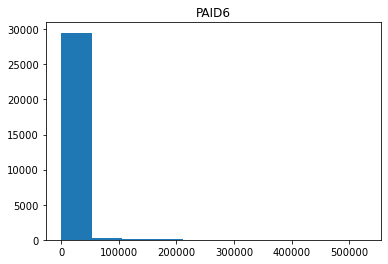

In [3]:
#We can use the iloc method to index the remaining columns
#This is the easiest method to select all the columns after the first one ("Defaulted Next Month")
predictors = credit_card_default.iloc[:,1:]

#The for loop iterates through a list that contains the column headers
#It then creates a separate histogram for each predictor
#It uses the show() function to create separate charts instead of adding separate layers to one chart
for predictor in list(predictors):
    plt.hist(predictors[predictor])
    plt.title(predictor)
    plt.show();

<hr style="height:2px;border-width:0;color:black;background-color:black">

Use the get_dummies function to convert the categorical features in the predictors variable to dummy features. Set the argument drop_first to True to remove any redundant dummy features.

There are a number of ways of doing this. Each one is correct as long as the predictors dataframe has replaced categorical features with dummy variables and that one dummy variable has been removed.

In [4]:
#There are a number of ways to use this function
#In this instance we specify the dataframe first
#Then we set the drop_first argument to True to automatically drop the first dummy variable
predictors=pd.get_dummies(predictors,drop_first=True)
predictors.head()

#If you don't set drop_first to equal true you can use the drop method in another line to remove a different dummy
#Or you can simply redefine the predictors variable and index all columns except for one of the dummies

,Credit Card Limit,Age,PAY_DELAY1,PAY_DELAY2,PAY_DELAY3,PAY_DELAY4,PAY_DELAY5,PAY_DELAY6,BILL1,BILL2,...,PAID3,PAID4,PAID5,PAID6,Sex_Male,Sex_Unspecified,Education level_High School,Education level_University Degree,Marriage_Other,Marriage_Single
ID,,,,,,,,,,,,,,,,,,,,,
219,110000,31,0,0,0,0,0,0,89989,84229,...,3000,3000,3000,8954,0,1,0,0,1,0
810,160000,37,0,0,0,0,0,0,2694,38433,...,891,1000,1098,426,0,1,1,0,1,0
821,200000,51,-1,-1,-1,-1,0,-1,780,0,...,780,0,390,390,0,1,0,0,1,0
1020,180000,45,-1,-1,-2,-2,-2,-2,4148,0,...,0,0,0,0,0,1,0,0,1,0
2147,150000,55,-1,-1,-1,-1,-1,-1,1080,17493,...,2939,3396,1870,6800,0,1,0,0,1,0


<hr style="height:2px;border-width:0;color:black;background-color:black">

Using the train_test_split() function from the model_selection portion of the sklearn library, split the response and predictors variables into training and testing versions. We'll use the training data to build the model and the testing data to check its accuracy.

Ensure that the testing datasets are 10% the size of the overall data. Set the random_state variable to 50 so that the split matches the solution file and future exercises.

Store the training and testing versions of the predictors and response variables in separate variables of their own.

In [5]:
#We'll start by importing the train_test_split() function from the model_selection portion of the sklearn library.
from sklearn.model_selection import train_test_split

#We'll store the output of this function in a variable called tt_split
#We'll specify the predictors and response variables
#We'll set test_size to 0.1 to make the test dataset just 10% of the total
#We'll set random_state to 50 so that the split matches the solution file and future exercises
tt_split = train_test_split(predictors, response, test_size=0.1, random_state=50)

#Below we store each element of the tt_split variable into separate variables
#This is because element of tt_split is an entire dataframe
#It's easier to access these later by referncing their name instead of indexing from tt_split
p_train = tt_split[0]
p_test = tt_split[1]
r_train = tt_split[2]
r_test = tt_split[3]

<hr style="height:2px;border-width:0;color:black;background-color:black">

Using the DecisionTreeClassifier() function from the tree portion of the sklearn library and the training datasets, train a decision tree model.

In [6]:
#We'll start by importing the DecisionTreeClassifier() function from the tree portion of the sklearn library.
from sklearn.tree import DecisionTreeClassifier

#Next we need to instantiate the DecisionTreeClassifier() function
#This simply means assigning it to a variable which we'll call tree
tree = DecisionTreeClassifier()
tree.fit(p_train, r_train);

<hr style="height:2px;border-width:0;color:black;background-color:black">

Use the .predict method() to make predictions for "Defaulted Next Month" on the testing dataset. The output of this method will be a list of predictions for every row in the testing dataset. These will be useful for gauging the accuracy of the model.

In [7]:
#We'll store this in a variable called r_predictions
#We'll use the .predict() method on the tree variable we created in the cell above
#We'll use this on the testing dataset containing our predictors
#This makes sense when we consider that we'd be using this on future data for customers who had not yet defaulted
r_predictions = tree.predict(p_test)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Using the confusion_matrix() function from the metrics portion of the sklearn library, build a confusion matrix that breaks down the True Negatives, False Negatives, True Positives and False Positives of your model's predictions when compared to testing data.

In [8]:
#We'll start by importing the confusion_matrix() function from the metrics portion of the sklearn library
from sklearn.metrics import confusion_matrix

print("   TN   FN")
#We'll then use the confusion_matrix() function within a print function
#We'll first specify the r_test dataframe which contains the true values for customers who defaulted
#We'll then specify the r_predictions dataframe which contains the model's predictions for who defaulted
print(confusion_matrix(r_test, r_predictions))
print("   TP   FP")

   TN   FN
[[1857  431]
 [ 429  283]]
   TP   FP


<hr style="height:2px;border-width:0;color:black;background-color:black">

Using the classification_report() function from the metrics portion of the sklearn library, build a classification report that details the accuracy, precision and recall of your model. These figures will give you a better indication of the model's ability to make reliable predictions than the output of a confusion matrix.

In [9]:
#We first need to import the classification_report() function from the metrics portion of the sklearn library
from sklearn.metrics import classification_report

#Then we can use the classification function which we'll wrap in a print function for visibility
#The first argument is the r_test dataframe which contains the true default status of the customers
#The next argument is r_predictions which contains the model's predictions for who defaulted
#We'll also specify the target_names argument as Paid and Defaulted to make the report easier to follow
print(classification_report(r_test, r_predictions,target_names=["Paid","Defaulted"]))

              precision    recall  f1-score   support

        Paid       0.81      0.81      0.81      2288
   Defaulted       0.40      0.40      0.40       712

    accuracy                           0.71      3000
   macro avg       0.60      0.60      0.60      3000
weighted avg       0.71      0.71      0.71      3000



<hr style="height:2px;border-width:0;color:black;background-color:black">

Prune the tree in advance by updating the DecisionTreeClassifier() function to change the max_depth to 2. This will make the tree easier to read and it'll also affect the performance of the model, hopefully for the better.

In [10]:
from sklearn.tree import DecisionTreeClassifier

#To set max_depth to 2, we simply need to type max_depth=2 inside the DecisionTreeClassifier() function
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(p_train, r_train)

DecisionTreeClassifier(max_depth=2)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Using the export_graphviz() function from the tree portion of the sklearn library and the Source function from the graphviz library, create a visualization of your decision tree model.

In the export_graphviz() function, set class names to ["Paid","Defaulted"] and set rounded and fillet to True.

In [16]:
# Use Anaconda prompt
# conda install python-graphviz

In [17]:
#We start by importing the graphviz library
#We also import the export_graphviz() function from the tree portion of the sklearn library
import graphviz
from sklearn.tree import export_graphviz

#We start by setting the export_graphviz() function in a variable called visualization_export
visualization_export = export_graphviz(
    #The first function is the variable that stores the DecisionTreeClassifier() function
    tree,
    #Next we need to specify a list containing the names of the features
    #We can get this by using the list() function on the predictors variable
    feature_names = list(predictors),
    #We then need to specify the names of the possible outcomes
    #We'll just type a list containing the strings "Paid" and "Default"
    class_names=["Paid","Defaulted"],  
    #Finally, we'll set rounded and filled to True for a better aesthetic look
    rounded=True,
    filled=True,
)

#We'll then use the Source() function from the graphviz library on the visualization_export variable to create the chart
decision_tree_visualization = graphviz.Source(visualization_export) 
decision_tree_visualization

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH